# 17기 KNN 정규세션 과제

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## KNN 구현해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. KNN 구현 & 파라미터 튜닝
수업 내용 및 실습 자료를 참고하여 KNN을 구현하고 파라미터 튜닝을 하며 결과를 비교해주세요.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

## 0. 데이터 불러오기

In [1]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/ToBig's/week4/blackfriday.csv", index_col = 0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


## EDA

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          3465 non-null   float64
 10  Product_Category_3          1544 non-null   float64
 11  Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 507.6+ KB


Product_Category_2, Product_Category_3에 결측치가 존재

In [3]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,4.998000e+03,4998.000000,4998.000000,4998.000000,3465.000000,1544.000000,4998.000000
mean,1.003015e+06,8.036815,0.421369,5.320128,9.773737,12.766839,9234.655462
std,1.709910e+03,6.442697,0.493828,3.912281,5.101867,4.023591,4999.225081
min,1.000003e+06,0.000000,0.000000,1.000000,2.000000,3.000000,13.000000
25%,1.001560e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5497.750000
50%,1.003040e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8049.000000
75%,1.004417e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12039.000000
max,1.006037e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23913.000000


In [4]:
df['Gender'].value_counts()

M    3765
F    1233
Name: Gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


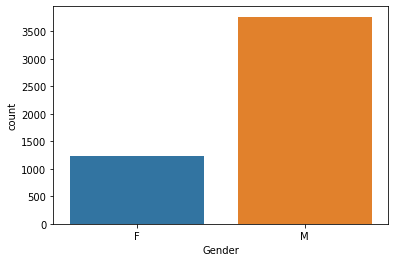

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(df['Gender'])

In [6]:
df['Age'].value_counts()

26-35    1996
36-45    1000
18-25     906
46-50     414
51-55     350
55+       195
0-17      137
Name: Age, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


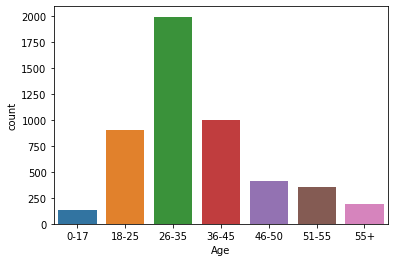

In [7]:
sns.countplot(df['Age'])

In [8]:
df['City_Category'].value_counts()

B    2102
C    1555
A    1341
Name: City_Category, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


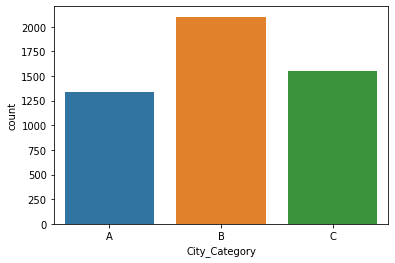

In [9]:
sns.countplot(df['City_Category'])

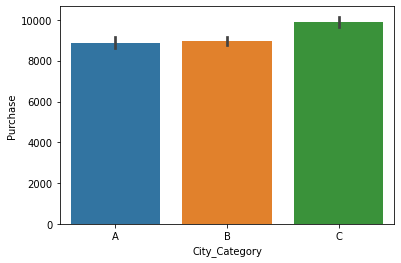

In [10]:
#도시 별 소비
sns.barplot(x='City_Category', y='Purchase', data = df)

In [11]:
df['Marital_Status'].value_counts()

0    2892
1    2106
Name: Marital_Status, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


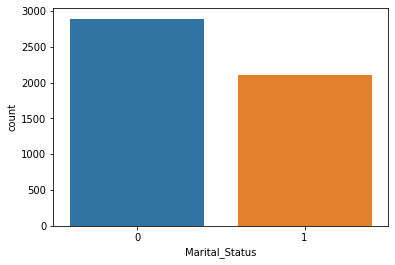

In [12]:
sns.countplot(df['Marital_Status'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


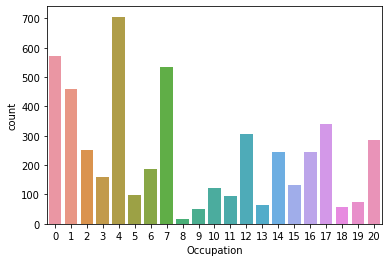

In [13]:
sns.countplot('Occupation',data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


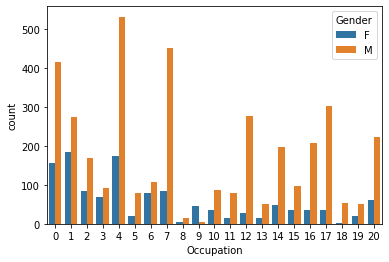

In [14]:
#성별에 따른 occupation
sns.countplot('Occupation',data = df, hue='Gender')

대부분 남성의 비율이 큰 것을 확인 할 수 있다. (단, 9번 제외)

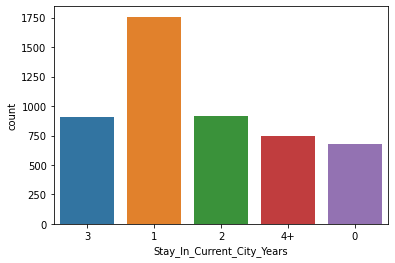

In [15]:
sns.countplot(x='Stay_In_Current_City_Years',data = df)

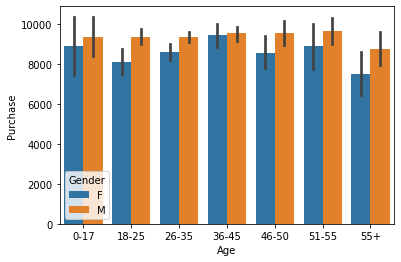

In [16]:
#성별과 연령에 따른 소비정도
sns.barplot(x='Age', y='Purchase',hue = 'Gender',data= df)

대체적으로 남성소비자의 소비가 많음을 알 수 있다.

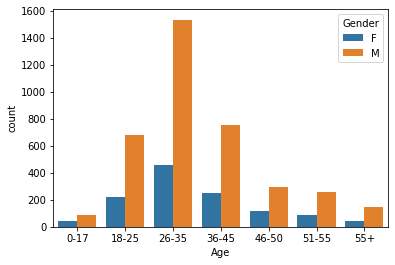

In [17]:
#성별과 연령별로 소비자의 분포 확인
sns.countplot(x='Age',hue = "Gender",data = df)

대부분 남성 소비자가 많으며, 특히 26-35 연령대의 경우가 두드러진다.

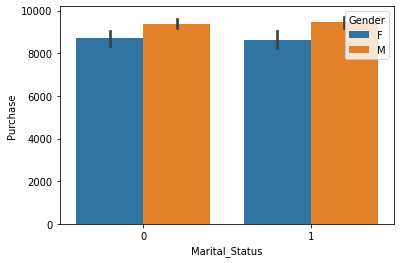

In [18]:
#결혼 여부 별로 나눈 성별 - 소비 분포 확인
sns.barplot(x='Marital_Status',y='Purchase',hue = 'Gender' ,  data =df)

결혼 여부와 관련 없이 남성 소비자의 소비가 많다.

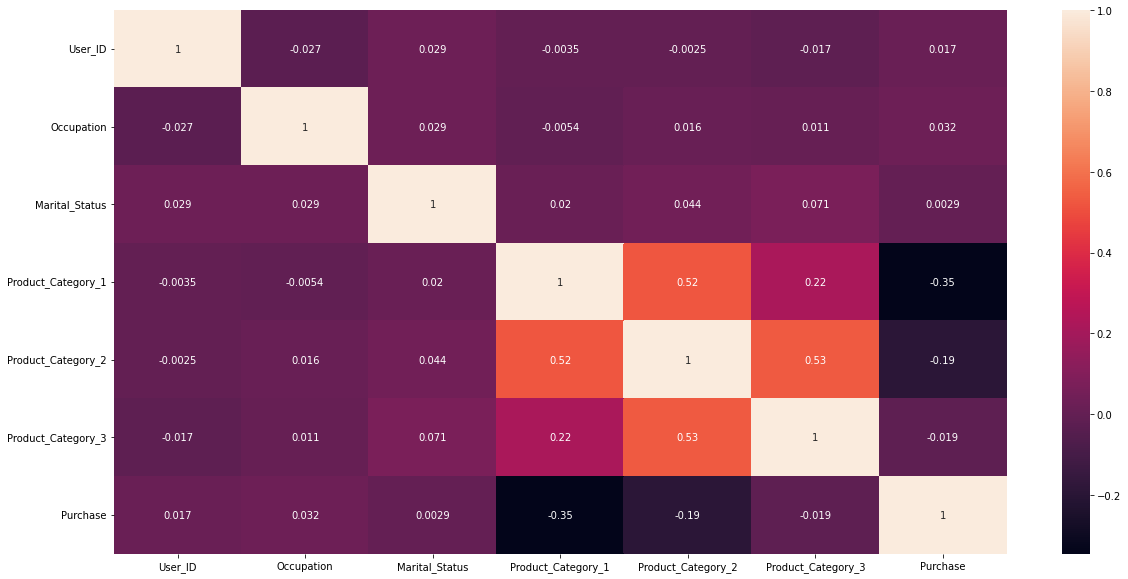

In [19]:
#수치형 좌표간의 상관관계 분석을 위한 히트맵 생성
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot = True)

상품 카테고리 간의 상관관계가 어느정도 존재하는 것을 관찰할 수 있다. 카테고리 1과 purchase 간에 어느정도의 음의 상관관계가 존재하는 것을 볼 수 있다.

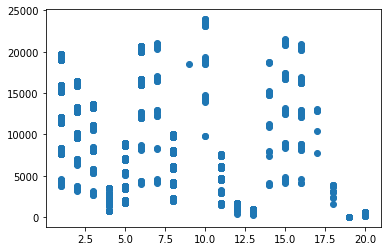

In [20]:
#상관관계가 있는지 확인
x = df['Product_Category_1']
y = df['Purchase']
plt.scatter(x, y)
plt.show()

시각화 결과 큰 상관성은 보이지 않는다.

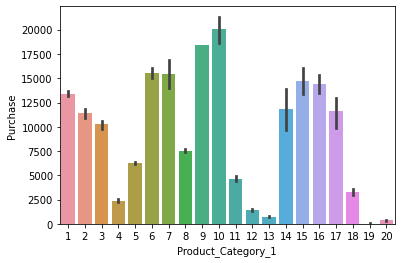

In [21]:
#상품 카테고리 1에 대해 더 알아보자.

sns.barplot(x='Product_Category_1',y = 'Purchase',data = df)

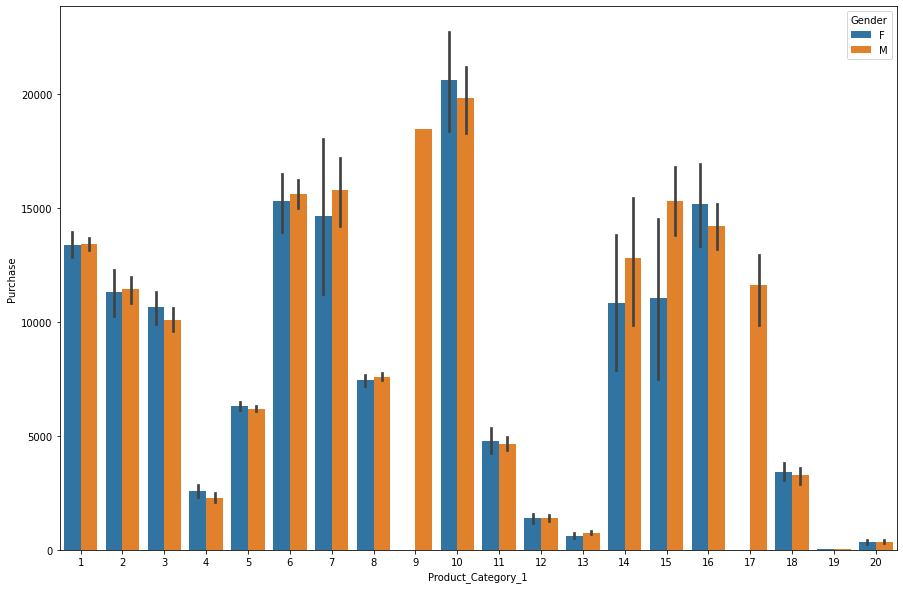

In [22]:
#성별에 따른 상품 카테고리
plt.figure(figsize=(15,10))
sns.barplot(x='Product_Category_1',y = 'Purchase',hue = "Gender",data = df)

9번과 17번 품목은 거의 대부분이 남성 소비자. 대부분 남성 소비자의 소비 비율이 크나, 10번, 16번의 경우 여성 소비자의 비율이 더 높음.

## KNN

EDA 결과 가장 분명하게 나뉠 수 있는 feature는 성별. 따라서 knn 모델을 통해 gender를 구분해낼 수 있도록 모델 생성 예정

In [23]:
df = df.drop('User_ID', axis = 1)

In [24]:
y = df['Gender']
X = df.drop('Gender', axis = 1)

In [25]:
#female 은 0으로, male은 1으로 원핫인코딩
y.replace({'F':0, 'M':1}, inplace=True)

In [26]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
4993    1
4994    1
4995    1
4996    1
4997    1
Name: Gender, Length: 4998, dtype: int64


In [27]:
#사용할 feature만 남겨서 X도 원핫인코딩
X = X.drop('Product_ID', axis = 1)
X = X.drop('Product_Category_2', axis = 1)
X = X.drop('Product_Category_3', axis = 1)
X

,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,0-17,10,A,3,0,5,2010
1,0-17,10,A,1,0,7,4483
2,0-17,10,A,1,0,1,7696
3,0-17,10,A,3,0,2,16429
4,0-17,10,A,3,0,3,5780
...,...,...,...,...,...,...,...
4993,55+,7,C,1,1,1,11701
4994,55+,1,C,1,1,8,2045
4995,55+,13,C,3,1,1,4505
4996,55+,0,C,2,1,12,1413


In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         4998 non-null   object
 1   Occupation                  4998 non-null   int64 
 2   City_Category               4998 non-null   object
 3   Stay_In_Current_City_Years  4998 non-null   object
 4   Marital_Status              4998 non-null   int64 
 5   Product_Category_1          4998 non-null   int64 
 6   Purchase                    4998 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 441.4+ KB


상품 아이디는 너무 많은 종류기 때문에 원핫인코딩 시 오히려 복잡하고, 과적합될 위험이 있어 제외. 상품 카테고리2,3은 결측치 존재로 인해 제외하는 것이 성능 향상에 도움이 될 것이라고 판단.

In [29]:
encoding_col = ['Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1']

In [31]:
#원핫인코딩
from sklearn.preprocessing import OneHotEncoder

encode = OneHotEncoder(sparse = False)
encode.fit(X[encoding_col])

OneHotEncoder(sparse=False)

In [35]:
X_encode = encode.transform(X[encoding_col])

columns = encode.categories_[0].tolist()

for index in range(len(encode.categories_)-1):
    columns += encode.categories_[index+1].tolist()
    
print(len(columns))

X_encode = pd.DataFrame(X_encode, columns=columns)

58


In [36]:
X_encode

,0-17,18-25,26-35,36-45,46-50,51-55,55+,0,1,2,...,11,12,13,14,15,16,17,18,19,20
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4994,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4995,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
X_encode = pd.concat([X_encode, X['Purchase']], axis = 1)

In [38]:
X_encode

,0-17,18-25,26-35,36-45,46-50,51-55,55+,0,1,2,...,12,13,14,15,16,17,18,19,20,Purchase
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4483
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7696
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16429
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11701
4994,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2045
4995,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4505
4996,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1413


In [39]:
#트레인 데스트 데이터셋 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encode, y, test_size = 0.2, 
                                                   shuffle = True)

X_train.reset_index(drop = True, inplace=True)
X_test.reset_index(drop = True, inplace=True)

In [40]:
#KNN을 적용하기 전 데이터 스케일링 진행
#info를 관찰했을 때 연속적인 수치형변수는 purchase 밖에 없으므로, 그에 대해 스케일링 진행
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train['Purchase'] = scaler.fit_transform(np.array(X_train['Purchase']).reshape(-1, 1))
X_test['Purchase'] = scaler.transform(np.array(X_test['Purchase']).reshape(-1, 1))

In [41]:
#KNN 모델 생성
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("Score_test :", knn.score(X_test, y_test))

Score_test : 0.747


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [42]:
#성능평가
from sklearn import metrics
print(metrics.classification_report(y_test, knn.predict(X_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0       0.50      0.24      0.33       252
           1       0.78      0.92      0.84       748

    accuracy                           0.75      1000
   macro avg       0.64      0.58      0.58      1000
weighted avg       0.71      0.75      0.71      1000



### 하이퍼파라미터 조정을 통해 성능 향상

복잡도 곡선을 그려서 최적의 k 값을 구한다.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

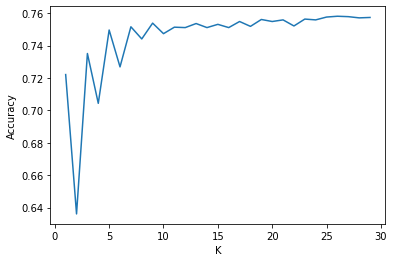

In [46]:
from sklearn.model_selection import cross_val_score
k_range = list(range(1,30))
score_list = []

for k in k_range :
    knn = KNeighborsClassifier(k)
    scores = cross_val_score(knn, X_train, y_train, cv=3, scoring = "accuracy")
    score_list.append(scores.mean()) #k-fold로 정확도 향상

plt.plot(k_range, score_list)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

k값을 증가 시켜도 0.76을 넘지 못함. k값 조정 전 정확도가 0.747이므로 k값을 조금 증가시키면 정확도가 약간이지만 향상될 것. -> 그러나 너무 적은 향상이기에 의미가 없다고 판단.